In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [6]:
#Load the dataset

df = pd.read_csv("supply_train.csv")
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [7]:
#check the shape of data

df.shape

(16620, 24)

In [8]:
#check number of columns

df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [9]:
#display information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 16620 non-null  object 
 1   WH_Manager_ID                 16620 non-null  object 
 2   Location_type                 16620 non-null  object 
 3   WH_capacity_size              16620 non-null  object 
 4   zone                          16620 non-null  object 
 5   WH_regional_zone              16620 non-null  object 
 6   num_refill_req_l3m            16620 non-null  int64  
 7   transport_issue_l1y           16620 non-null  int64  
 8   Competitor_in_mkt             16620 non-null  int64  
 9   retail_shop_num               16620 non-null  int64  
 10  wh_owner_type                 16620 non-null  object 
 11  distributor_num               16620 non-null  int64  
 12  flood_impacted                16620 non-null  int64  
 13  f

In [10]:
#description about the data

df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [11]:
#check datatypes

df.dtypes

Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64
dtype: object

In [12]:
#checking if there any duplicated rows

df.duplicated().sum()

0

In [13]:
#checking for missing values

df.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

###### 3 columns contain missing values such as workers_num,wh_set_year,approved_wh_govt_certificate

## Missing value Imputation

In [14]:
#Imputing the missing values in workers_num with the mean

df["workers_num"].fillna(df["workers_num"].mean(),inplace=True)

In [15]:
#Imputing the missing values in approved_wh_govt_certificate with mode

df["approved_wh_govt_certificate"].fillna(df["approved_wh_govt_certificate"].mode()[0],inplace=True)

In [16]:
df.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                        0
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate       0
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [17]:
#Droping wh_est_year due to large number of missing values

df.drop(columns=["wh_est_year"],inplace=True)
df.dropna(axis=0)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,1,91,29.00000,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,0,1,210,31.00000,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,0,161,37.00000,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,0,103,21.00000,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,0,1,112,25.00000,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,4779,...,0,0,240,19.00000,14,0,B+,5,23,16094
16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,5718,...,0,1,164,30.00000,17,0,B+,6,24,21113
16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,4514,...,0,1,211,24.00000,24,1,B,5,29,28117
16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,5829,...,0,1,119,28.91149,16,0,A,5,15,21103


In [18]:
df.drop(columns=["Ware_house_ID","WH_Manager_ID"],inplace=True)

In [19]:
df.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [20]:
#checking categorical columns

categorical_columns = [column for column in df.columns if df[column].dtype=='object']

In [21]:
categorical_columns

['Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

In [22]:
#performing one-hot encoding for categorical variables

categorical_cols= ['Location_type','WH_capacity_size','zone','WH_regional_zone','wh_owner_type','approved_wh_govt_certificate']
df_encoded = pd.get_dummies(df, columns=categorical_cols,drop_first=True)

In [23]:
#checking the shape of encoded columns

df_encoded.shape

(16620, 31)

In [24]:
df_encoded.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,3,1,2,4651,24,0,1,1,91,29.0,...,0,0,0,0,1,1,0,0,0,0
1,0,0,4,6217,47,0,0,1,210,31.0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,4,4306,64,0,0,0,161,37.0,...,1,0,0,0,0,0,0,0,0,0
3,7,4,2,6000,50,0,0,0,103,21.0,...,0,1,0,0,0,1,1,0,0,0
4,3,1,2,4740,42,1,0,1,112,25.0,...,0,0,0,1,0,0,0,0,0,1


In [25]:
#count of outliers

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
outliers = pd.DataFrame(((df > (q3+1.5*IQR)) | (df < (q1-IQR*1.5))).sum(axis=0),columns=["No of outliers"])
outliers["Percentage of outliers"] = round(outliers["No of outliers"]*100/len(df),2)
outliers

C:\Users\USER\AppData\Local\Temp\ipykernel_3636\3836613649.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.25)
C:\Users\USER\AppData\Local\Temp\ipykernel_3636\3836613649.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.75)
C:\Users\USER\AppData\Local\Temp\ipykernel_3636\3836613649.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = pd.DataFrame(((df > (q3+1.5*IQR)) | (df < (q1-IQR*1.5))).sum(axis=0),columns=["No o

,No of outliers,Percentage of outliers
Competitor_in_mkt,62,0.37
Location_type,0,0.00
WH_capacity_size,0,0.00
WH_regional_zone,0,0.00
approved_wh_govt_certificate,0,0.00
dist_from_hub,0,0.00
distributor_num,0,0.00
electric_supply,0,0.00
flood_impacted,1610,9.69
flood_proof,931,5.60


### Exploratory Data Analysis (EDA) Visualizations

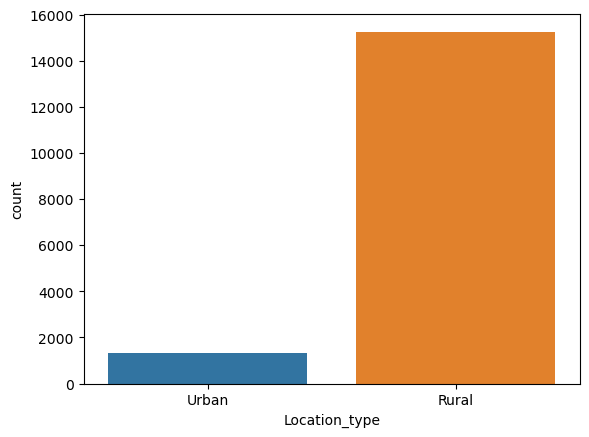

In [26]:
#warehouse distribution by location type

sns.countplot(x="Location_type", data=df)
plt.show()

From this visualization we can see that the substantial portion of the warehouses in the dataset is located in rural areas . so this information is important for managing the supply chain effectively, as it suggests that rural areas may require more attention in terms of logistics and inventory management

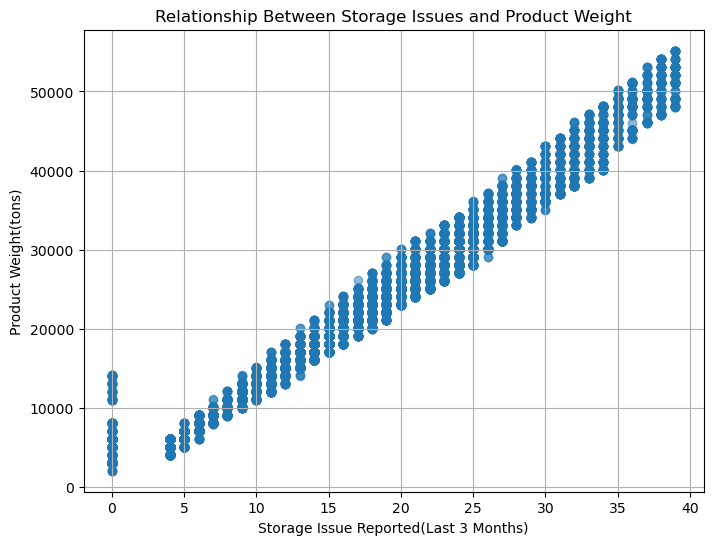

In [27]:
#Relationship between storage issue reports and product weight

plt.figure(figsize=(8,6))
plt.scatter(df["storage_issue_reported_l3m"], df["product_wg_ton"], alpha=0.5)
plt.xlabel("Storage Issue Reported(Last 3 Months)")
plt.ylabel("Product Weight(tons)")
plt.title("Relationship Between Storage Issues and Product Weight")
plt.grid(True)
plt.show()

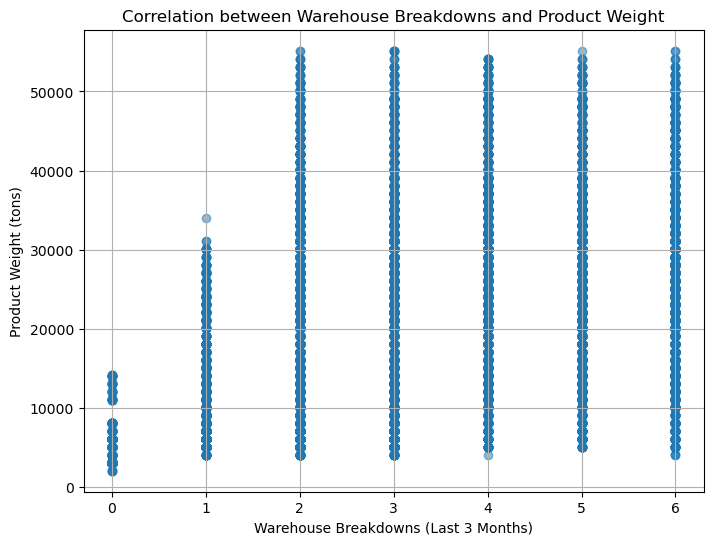

In [28]:
#Correlation between Warehouse Breakdowns and product weight

plt.figure(figsize=(8, 6))
plt.scatter(df['wh_breakdown_l3m'], df['product_wg_ton'], alpha=0.5)
plt.xlabel('Warehouse Breakdowns (Last 3 Months)')
plt.ylabel('Product Weight (tons)')
plt.title('Correlation between Warehouse Breakdowns and Product Weight')
plt.grid(True)
plt.show()

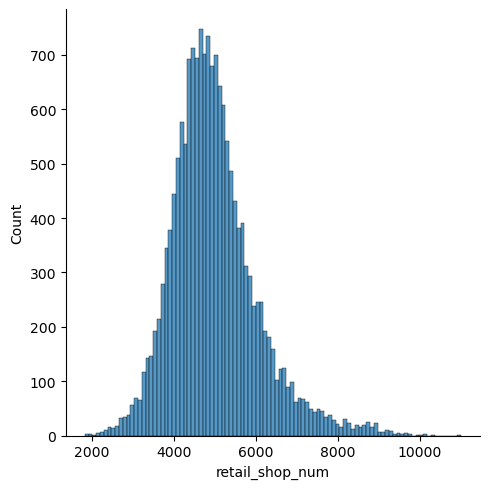

In [29]:
#Distribution of Retail Shop Numbers

sns.displot(df['retail_shop_num'])

The plot shows how retail shop numbers are typically distributed among the warehouses. It helps us understand the common patterns in shop counts, providing insights into the structure of the supply chain's retail network.

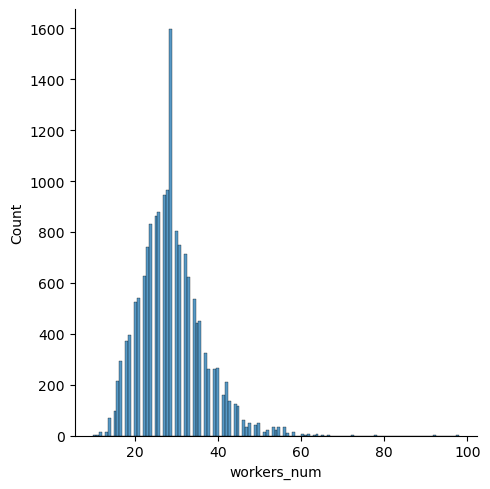

In [30]:
#Distribution of Workers Numbers and Insights

sns.displot(df["workers_num"])

###### The graph shows how the number of workers is spread out across different situations.This can help us understand how many people are typically needed to manage the supply chain effectively.

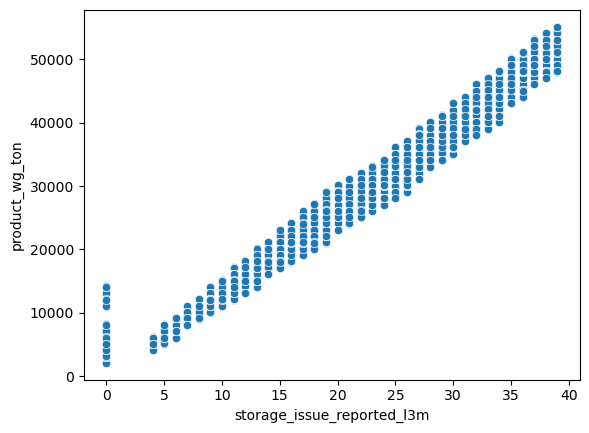

In [31]:
#Storage Issues Vs Product Weight

sns.scatterplot(data=df, x="storage_issue_reported_l3m",y="product_wg_ton")
plt.show()

###### The scatterplot above reveals a strong positive correlation between the storage issues reported during the last 3 months and the quantity of products shipped within the same period.

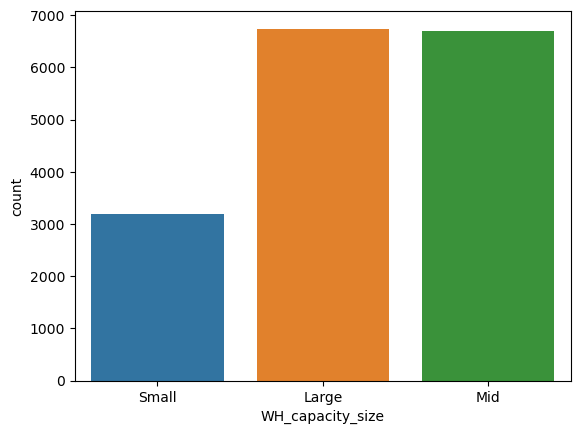

In [32]:
#Warehouse capacity distribution

sns.countplot(data=df,x="WH_capacity_size")
plt.show()

###### The count plot shows us how warehouse sizes are distributed. It's clear that medium-sized warehouses are the most common in the dataset, suggesting that these sizes are more typical within the supply chain management system.

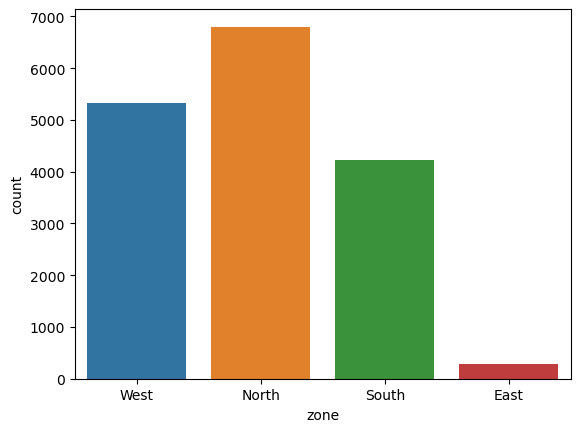

In [33]:
#zone-wise Distribution of warehouses

sns.countplot(data=df,x="zone")
plt.show()

###### In this above countplot,it's clear that most warehouses are in the North zone. This tells us where the warehouses are located geographically, and it's important information for making supply chain and delivery plans in those areas.

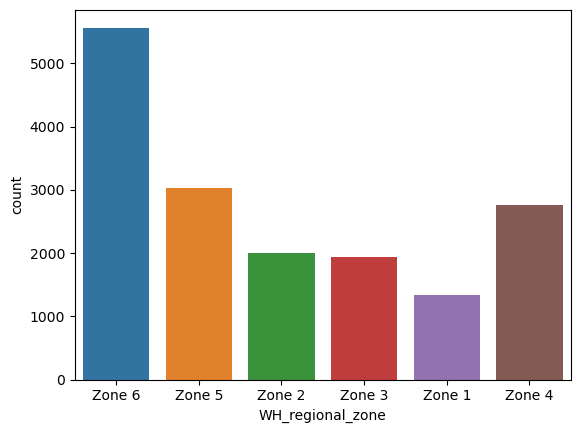

In [34]:
#Regional zone distribution of warehouses

sns.countplot(data=df,x="WH_regional_zone")
plt.show()

###### Most warehouses are in Zone-6. This suggests that there's a strong preference for this specific regional zone when it comes to warehouse locations.

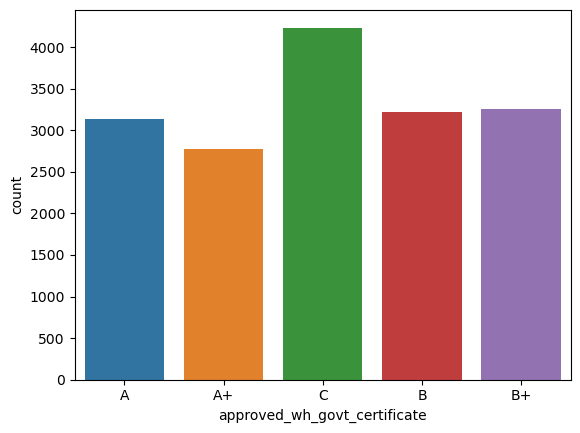

In [35]:
#Warehouse Government Certificate Status Distribution

sns.countplot(data=df,x="approved_wh_govt_certificate")
plt.show()

###### The count plot shows us what types of government-approved certificates the warehouses have. Most of them have 'C' type certificates, which is the most common category.

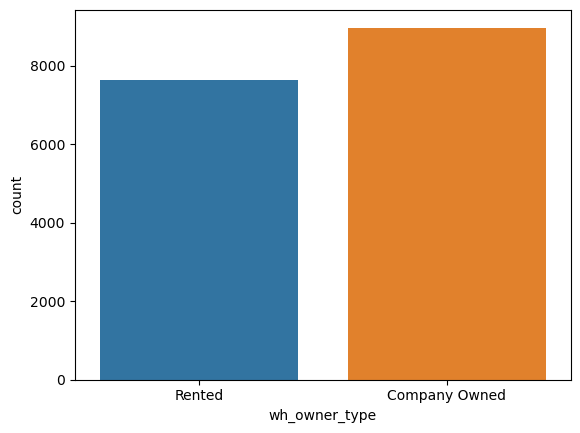

In [36]:
#Warehouses by ownership type

sns.countplot(data=df,x="wh_owner_type")
plt.show()

###### The count plot shows us who owns the warehouses. Most of the warehouses are owned by the company itself, which means the company has a strong presence in its supply chain infrastructure.

C:\Users\USER\AppData\Local\Temp\ipykernel_3636\754315626.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm")


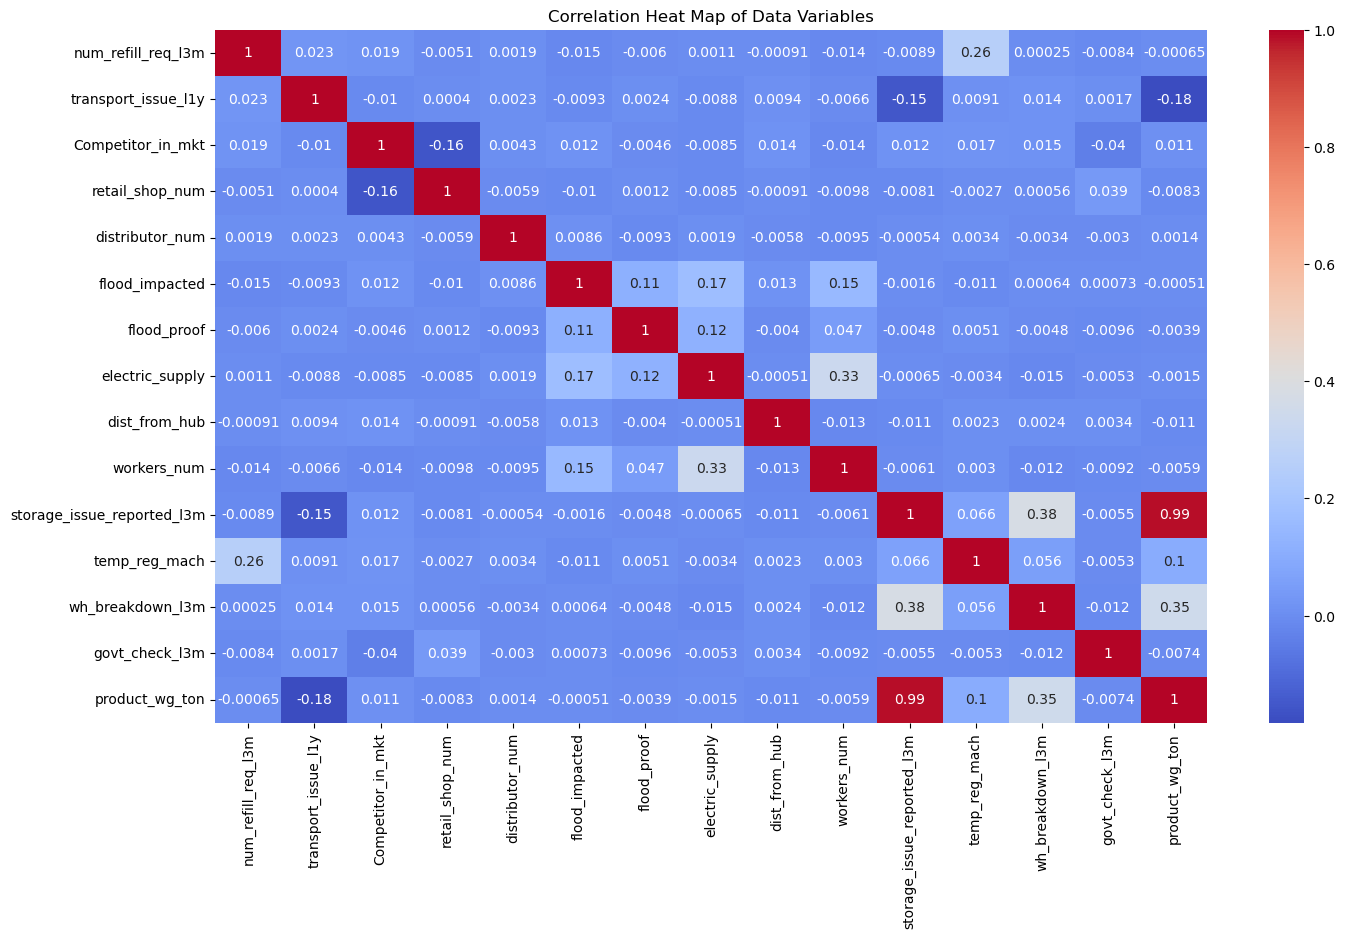

In [37]:
#Correlation heatmap of data variables

plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heat Map of Data Variables")
plt.show()

###### From this, we can see that when there are more storage issues reported in the last three months, it tends to have a big impact on sales shipments. This tells us that improving storage management can boost overall sales performance.

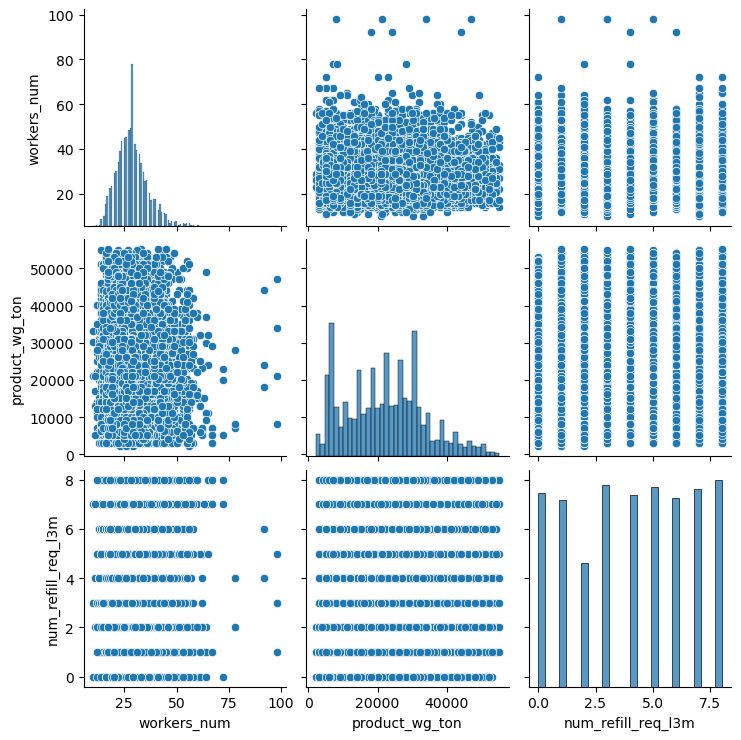

In [38]:
#Relationship Between Different Variables

vars = ["workers_num","product_wg_ton","num_refill_req_l3m"]
sns.pairplot(df[vars])
plt.show()

###### The pair plot shows how different variables are related all at once. It helps us understand how 'num_refill_req_l3m', 'product_wg_ton', and 'workers_num' affect each other. This visualization helps us spot any connections or patterns among these variables.

## Data Splitting

In [40]:
#Seperating the target value 

x =df_encoded.drop(columns=["product_wg_ton"])
y = df_encoded["product_wg_ton"]

In [41]:
#Split the data into training and testing sets

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state= 0)

In [42]:
#Scaling the values

scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [43]:
#creating a placeholder dataframe for model evaluation results

columns = ['Model Name', 'Mean_Absolute_Error_MAE', 'Adj_R_Square', 'Root_Mean_Squared_Error_RMSE',
           'Mean_Absolute_Percentage_Error_MAPE', 'Mean_Squared_Error_MSE',
           'Root_Mean_Squared_Log_Error_RMSLE', 'R2_score']
results = pd.DataFrame(columns=columns)
results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [44]:
#Build the Regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
#Creating Objects of Regression

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelsvr = SVR()
modelknn = KNeighborsRegressor(n_neighbors=5)
modeletr = ExtraTreesRegressor()
modelre = Ridge()
modello = linear_model.Lasso(alpha=0.1)
modelgbr = GradientBoostingRegressor()

In [56]:
#Evaluation matrix for all the algorithms

mm = [modelmlg, modeldcr,modelbag, modelrfr, modelsvr, modelknn, modeletr, modelre, modello, modelgbr]

for models in mm:
    models.fit(x_train, y_train)
    y_pred = models.predict(x_test)
    print("Model Name:",models)
    
    #Evaluation matrix for Regression Analysis
    
    from sklearn import metrics
    
    print("Mean Absolute Error (MAE):",round(metrics.mean_absolute_error(y_test, y_pred),3))
    print("Mean Squared Error (MSE):",round(metrics.mean_squared_error(y_test, y_pred),3))
    print("Root Mean Squared Error (RMSE):",round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print("R2_score:",round(metrics.r2_score(y_test, y_pred),6))
    print("Root Mean Squared Log Error (RMSLE):",round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    #Define the function to calculate the mean absolute percentage error (MAPE)
    
    def MAPE (y_test, y_pred):
        y_test,y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    #Evaluation of MAPE
    
    result = MAPE(y_test, y_pred)
    print("Mean Absolute Percentage Error (MAPE):", round(result, 2),"%")
    
    #Calculate Adjusted R squared values
    
    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    results = results.append(new_row, ignore_index=True)

Model Name: LinearRegression()
Mean Absolute Error (MAE): 1001.866
Mean Squared Error (MSE): 1881596.704
Root Mean Squared Error (RMSE): 1371.713
R2_score: 0.986323
Root Mean Squared Log Error (RMSLE): 7.224
Mean Absolute Percentage Error (MAPE): 7.41 %
Adj R Square:  0.986298


C:\Users\USER\AppData\Local\Temp\ipykernel_3636\1120857250.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


Model Name: DecisionTreeRegressor()
Mean Absolute Error (MAE): 933.367
Mean Squared Error (MSE): 2089524.502
Root Mean Squared Error (RMSE): 1445.519
R2_score: 0.984812
Root Mean Squared Log Error (RMSLE): 7.276
Mean Absolute Percentage Error (MAPE): 6.3 %
Adj R Square:  0.984785


C:\Users\USER\AppData\Local\Temp\ipykernel_3636\1120857250.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


Model Name: BaggingRegressor()
Mean Absolute Error (MAE): 750.061
Mean Squared Error (MSE): 1053935.322
Root Mean Squared Error (RMSE): 1026.614
R2_score: 0.992339
Root Mean Squared Log Error (RMSLE): 6.934
Mean Absolute Percentage Error (MAPE): 5.04 %
Adj R Square:  0.992325


C:\Users\USER\AppData\Local\Temp\ipykernel_3636\1120857250.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


Model Name: RandomForestRegressor()
Mean Absolute Error (MAE): 727.794
Mean Squared Error (MSE): 975528.576
Root Mean Squared Error (RMSE): 987.689
R2_score: 0.992909
Root Mean Squared Log Error (RMSLE): 6.895
Mean Absolute Percentage Error (MAPE): 4.92 %
Adj R Square:  0.992896


C:\Users\USER\AppData\Local\Temp\ipykernel_3636\1120857250.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


Model Name: SVR()
Mean Absolute Error (MAE): 9619.502
Mean Squared Error (MSE): 135916330.722
Root Mean Squared Error (RMSE): 11658.316
R2_score: 0.01205
Root Mean Squared Log Error (RMSLE): 9.364
Mean Absolute Percentage Error (MAPE): 80.3 %
Adj R Square:  0.010263


C:\Users\USER\AppData\Local\Temp\ipykernel_3636\1120857250.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


Model Name: KNeighborsRegressor()
Mean Absolute Error (MAE): 7230.35
Mean Squared Error (MSE): 82103684.334
Root Mean Squared Error (RMSE): 9061.108
R2_score: 0.403204
Root Mean Squared Log Error (RMSLE): 9.112
Mean Absolute Percentage Error (MAPE): 52.21 %
Adj R Square:  0.402125


C:\Users\USER\AppData\Local\Temp\ipykernel_3636\1120857250.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


Model Name: ExtraTreesRegressor()
Mean Absolute Error (MAE): 742.275
Mean Squared Error (MSE): 1009826.534
Root Mean Squared Error (RMSE): 1004.901
R2_score: 0.99266
Root Mean Squared Log Error (RMSLE): 6.913
Mean Absolute Percentage Error (MAPE): 4.88 %
Adj R Square:  0.992647
Model Name: Ridge()
Mean Absolute Error (MAE): 1001.639
Mean Squared Error (MSE): 1881783.594
Root Mean Squared Error (RMSE): 1371.781
R2_score: 0.986322
Root Mean Squared Log Error (RMSLE): 7.224
Mean Absolute Percentage Error (MAPE): 7.4 %
Adj R Square:  0.986297
Model Name: Lasso(alpha=0.1)
Mean Absolute Error (MAE): 1001.426
Mean Squared Error (MSE): 1881306.3
Root Mean Squared Error (RMSE): 1371.607
R2_score: 0.986325
Root Mean Squared Log Error (RMSLE): 7.224
Mean Absolute Percentage Error (MAPE): 7.41 %
Adj R Square:  0.9863


C:\Users\USER\AppData\Local\Temp\ipykernel_3636\1120857250.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_3636\1120857250.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_3636\1120857250.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


Model Name: GradientBoostingRegressor()
Mean Absolute Error (MAE): 701.129
Mean Squared Error (MSE): 882204.815
Root Mean Squared Error (RMSE): 939.258
R2_score: 0.993587
Root Mean Squared Log Error (RMSLE): 6.845
Mean Absolute Percentage Error (MAPE): 4.76 %
Adj R Square:  0.993575


C:\Users\USER\AppData\Local\Temp\ipykernel_3636\1120857250.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


In [57]:
results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),1001.866481,0.986298,1371.713054,7.411199,1.881597e+06,7.223816,0.986323
1,DecisionTreeRegressor(),934.092359,0.984367,1465.203442,6.428570,2.146821e+06,7.289749,0.984395
2,(DecisionTreeRegressor(random_state=1018271851...,745.613237,0.992528,1013.024985,4.947281,1.026220e+06,6.920696,0.992541
3,"(DecisionTreeRegressor(max_features=1.0, rando...",728.649320,0.992909,986.787713,4.921724,9.737500e+05,6.894455,0.992922
4,SVR(),9619.502498,0.010263,11658.315947,80.296042,1.359163e+08,9.363775,0.012050
5,KNeighborsRegressor(),7230.349579,0.402125,9061.108339,52.214541,8.210368e+07,9.111747,0.403204
6,"(ExtraTreeRegressor(random_state=779567780), E...",742.611940,0.992674,1003.050807,4.902146,1.006111e+06,6.910801,0.992687
7,Ridge(),1001.638992,0.986297,1371.781176,7.401980,1.881784e+06,7.223865,0.986322
8,Lasso(alpha=0.1),1001.425975,0.986300,1371.607196,7.409060,1.881306e+06,7.223738,0.986325
9,([DecisionTreeRegressor(criterion='friedman_ms...,698.919711,0.993611,936.660729,4.750056,8.773333e+05,6.842321,0.993623


In [58]:
# Model Performance Comparison

models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,Lasso Regression,0.993611,698.919711,936.660729,4.750056,8.773333e+05,6.842321,0.993623
1,KNeighborsRegressor,0.992909,728.649320,986.787713,4.921724,9.737500e+05,6.894455,0.992922
2,XGBRegressor,0.992674,742.611940,1003.050807,4.902146,1.006111e+06,6.910801,0.992687
3,RandomForestRegressor,0.992528,745.613237,1013.024985,4.947281,1.026220e+06,6.920696,0.992541
4,Ridge Regression,0.986300,1001.425975,1371.607196,7.409060,1.881306e+06,7.223738,0.986325
5,LinearRegression,0.986298,1001.866481,1371.713054,7.411199,1.881597e+06,7.223816,0.986323
6,BaggingRegressor,0.986297,1001.638992,1371.781176,7.401980,1.881784e+06,7.223865,0.986322
7,DecisionTreeRegressor,0.984367,934.092359,1465.203442,6.428570,2.146821e+06,7.289749,0.984395
8,GradientBoostingRegressor,0.402125,7230.349579,9061.108339,52.214541,8.210368e+07,9.111747,0.403204
9,ExtraTreesRegressor,0.010263,9619.502498,11658.315947,80.296042,1.359163e+08,9.363775,0.012050


In [59]:
#Trainig the model with

modelgbr.fit(x_train, y_train)

# Predict the model with test data

y_pred = modelrfr.predict(x_test)


In [60]:
# Creating a DataFrame for predicted and actual product weights

out=pd.DataFrame({'product_wg_ton_actual':y_test,'product_wg_ton_pred':y_pred})
result=df.merge(out,left_index=True,right_index=True)

In [61]:
result

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,product_wg_ton_actual,product_wg_ton_pred
8,Rural,Small,South,Zone 6,8,1,4,5381,Rented,42,...,124,22.00000,13,1,A+,5,2,18082,18082,17350.05
9,Rural,Small,South,Zone 6,4,3,3,3869,Company Owned,35,...,78,43.00000,6,0,C,6,2,7130,7130,7760.14
12,Urban,Mid,North,Zone 2,4,0,3,5012,Rented,48,...,95,28.00000,4,0,B+,1,1,5124,5124,4767.11
16,Rural,Mid,West,Zone 4,0,0,2,5569,Company Owned,16,...,231,28.00000,9,0,B+,5,11,12127,12127,11245.12
18,Rural,Mid,North,Zone 3,4,1,4,4598,Rented,58,...,159,22.00000,29,1,A+,5,27,38082,38082,38517.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16604,Rural,Mid,South,Zone 4,3,0,2,5604,Rented,20,...,67,28.91149,17,1,A+,5,26,22057,22057,23514.02
16608,Rural,Mid,West,Zone 4,3,0,2,6678,Company Owned,39,...,201,26.00000,18,1,B,6,11,21085,21085,22399.22
16614,Urban,Mid,West,Zone 4,3,0,4,5377,Rented,66,...,78,28.91149,16,0,A,3,26,21069,21069,21482.30
16616,Urban,Large,North,Zone 5,2,0,2,5718,Company Owned,26,...,164,30.00000,17,0,B+,6,24,21113,21113,21159.44


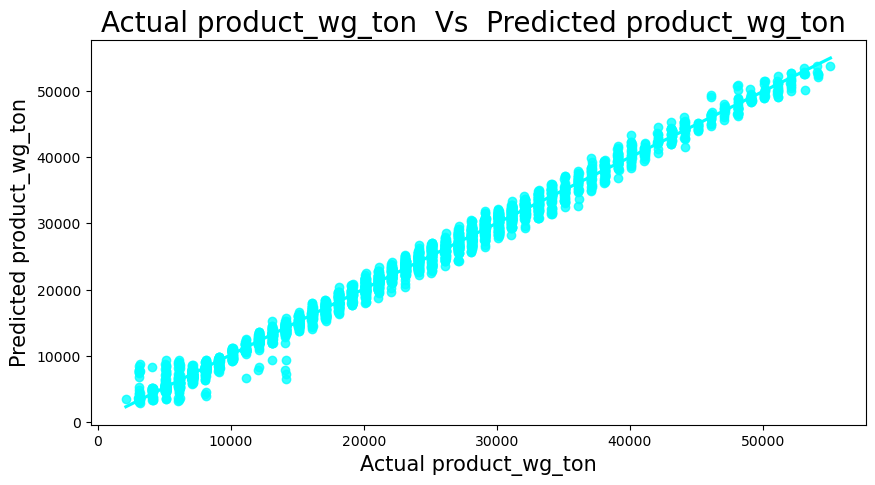

In [62]:
# Create a scatter plot with regression line

plt.figure(figsize=(10,5))
sns.regplot(x='product_wg_ton_actual',y='product_wg_ton_pred',data=result,color='cyan')

# Set plot labels and title

plt.title('Actual product_wg_ton  Vs  Predicted product_wg_ton ',fontsize=20)
plt.xlabel('Actual product_wg_ton',fontsize=15)
plt.ylabel('Predicted product_wg_ton',fontsize=15)

# Display the plot

plt.show()

###### When we look at the plot that compares our predictions to the real values, we notice something impressive: our predictions are very close to the actual values most of the time. This tells us that our model is doing a good job understanding the data patterns, and it's making accurate predictions that match reality closely.

## Hyperparameter tuning

###### When utilizing the gradient-boosting algorithm, it's important to note that certain parameters are interdependent, preventing us from adjusting them in isolation. In this context, key parameters such as n_estimators, learning_rate, and the choice betweenmax_depth and max_leaf_nodes are tightly interconnected. This means that modifying one parameter may influence the behavior or effectiveness of another. Therefore, a careful and holistic approach to parameter tuning is essential to achieve optimal performance with the gradient-boosting algorithm.

In [63]:
from scipy.stats import loguniform
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [86]:
# Randomized Hyperparameter Search Results for Gradient Boosting Regressor

param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": loguniform(0.01, 1),
}
search_cv = RandomizedSearchCV(
    GradientBoostingRegressor(),
    param_distributions=param_distributions,
    scoring="neg_mean_absolute_error",
    n_iter=20,
    random_state=0,
    n_jobs=2,
)
search_cv.fit(x_train, y_train)

columns = [f"param_{name}" for name in param_distributions.keys()]
columns += ["mean_test_error", "std_test_error"]
cv_results = pd.DataFrame(search_cv.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
cv_results[columns].sort_values(by="mean_test_error")

,param_n_estimators,param_max_leaf_nodes,param_learning_rate,mean_test_error,std_test_error
10,200,20,0.109889,707.663601,13.479026
12,200,50,0.110585,708.180345,11.209781
1,200,20,0.160519,709.751912,12.379939
17,500,5,0.771785,793.898217,10.940501
6,500,100,0.709894,804.854846,16.070783
3,500,2,0.07502,832.930844,14.453077
18,10,5,0.637819,977.626421,42.757813
4,100,5,0.0351,1026.946547,26.208340
8,5,2,0.462636,2805.845890,42.819104
19,5,20,0.202432,3331.777734,39.224819


In [72]:
print("The best estimator returned by Randomsearchcv CV is:",search_cv.best_estimator_)

The best estimator returned by Randomsearchcv CV is: GradientBoostingRegressor(learning_rate=0.1098891866898283, max_leaf_nodes=20,
                          n_estimators=200)


In [73]:
gb = search_cv.best_estimator_
gb.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.1098891866898283, max_leaf_nodes=20,
                          n_estimators=200)

In [74]:
y_pred =gb.predict(x_test)

In [75]:
y_pred

array([36390.25178539, 14134.18045394, 28691.03103073, ...,
       16080.86464031, 31505.95904701, 13560.74872059])

In [78]:
# Model Performance Summary: Gradient Boosting Regressor

models=['GB']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,GB,0.986298,1001.866481,1371.713054,7.411199,1.881597e+06,7.223816,0.986323
